# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

/Users/hugodejong/PycharmProjects/pythonProject/venv/lib/python3.12/site-packages/mesa/time.py:79: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


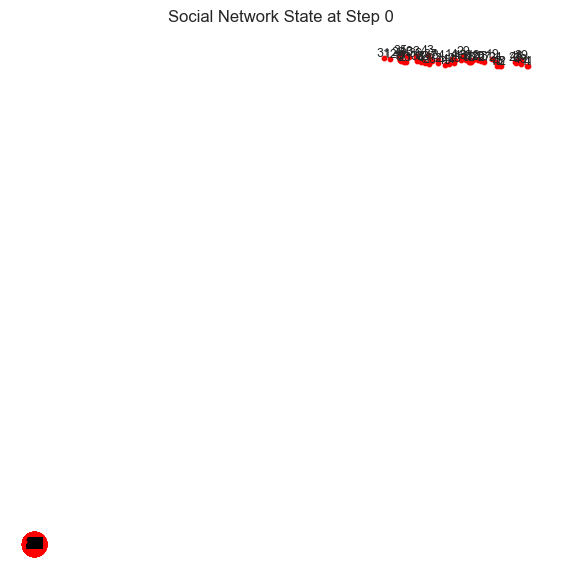

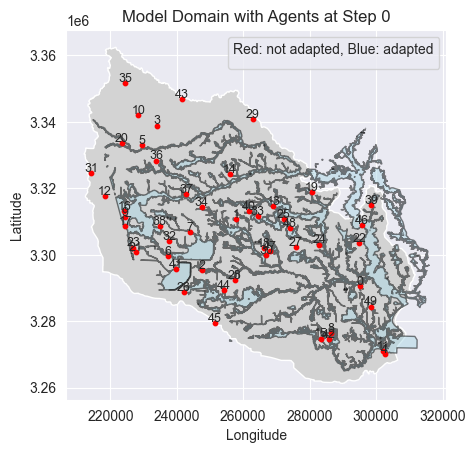

<Figure size 1000x600 with 0 Axes>

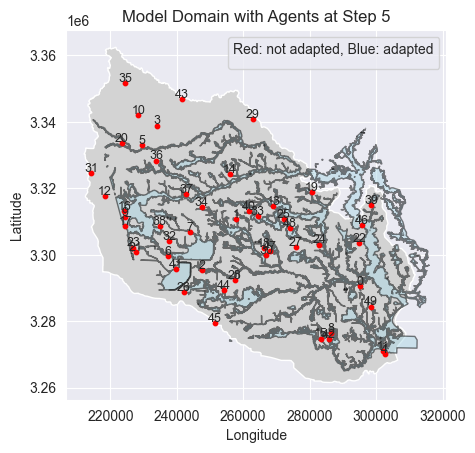

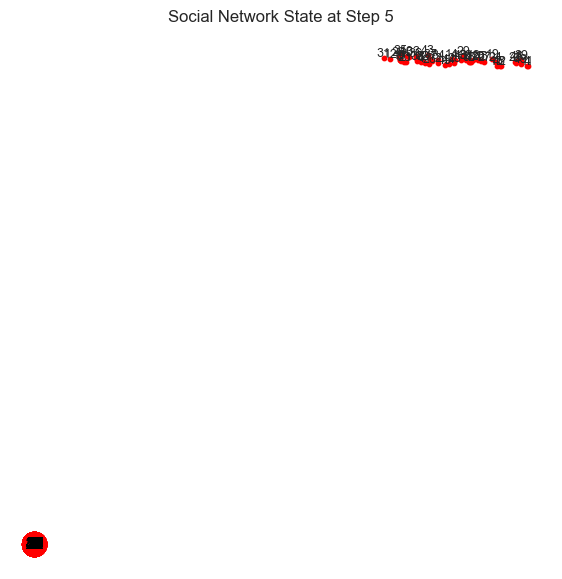

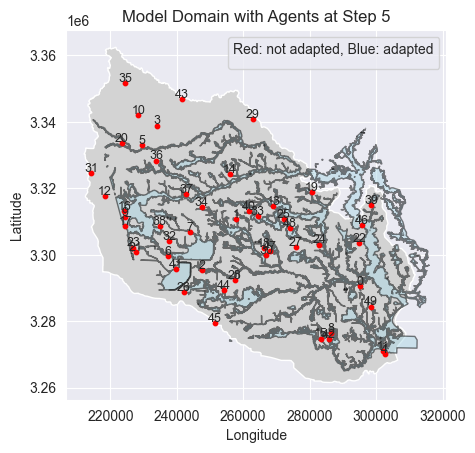

<Figure size 1000x600 with 0 Axes>

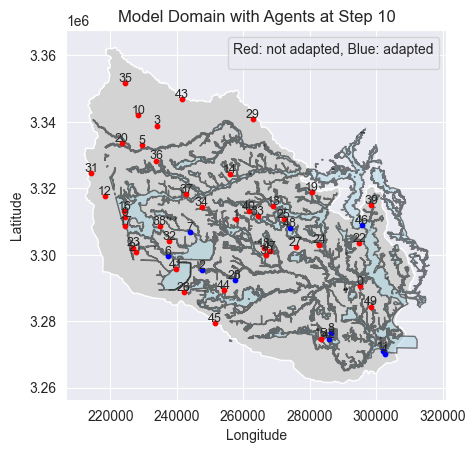

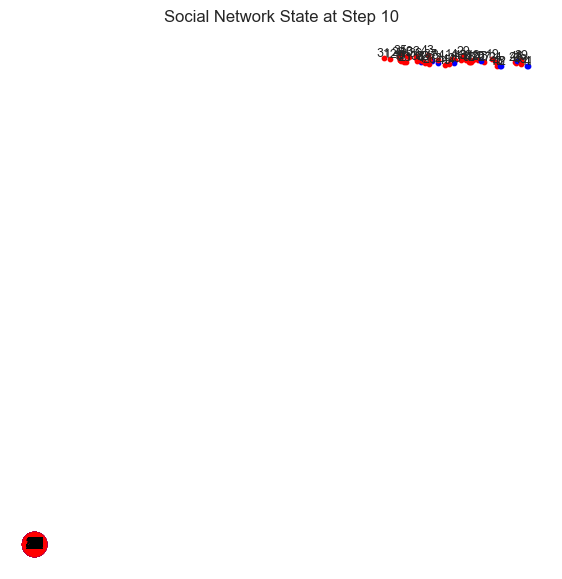

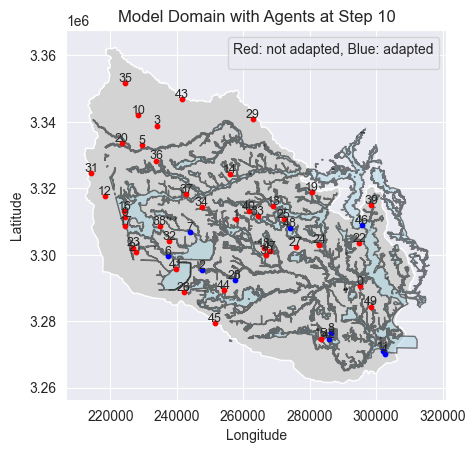

<Figure size 1000x600 with 0 Axes>

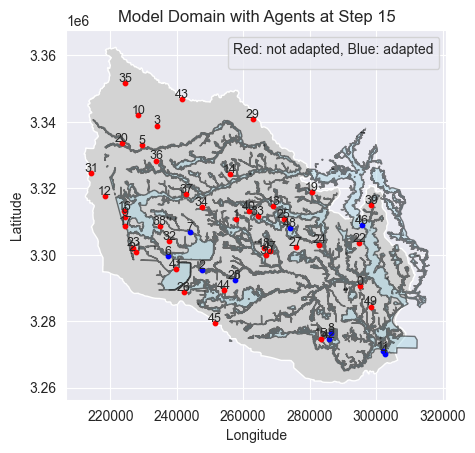

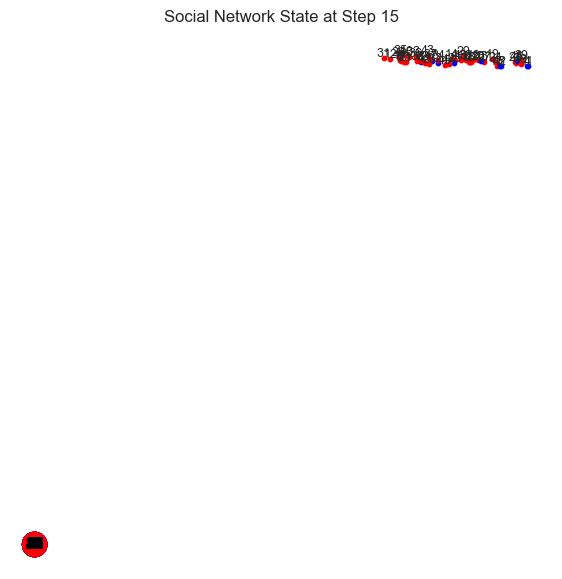

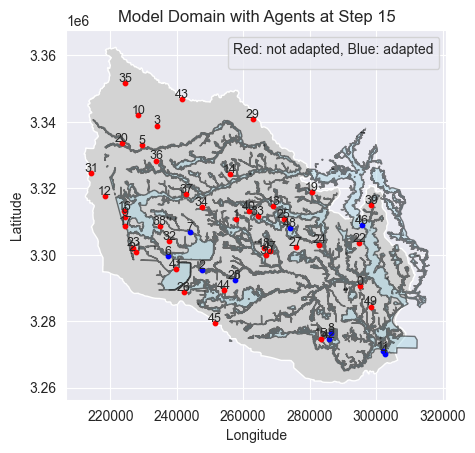

<Figure size 1000x600 with 0 Axes>

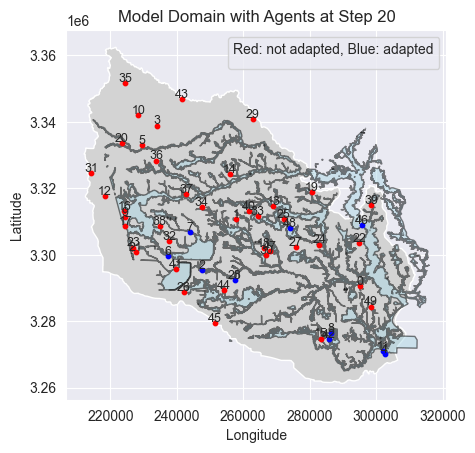

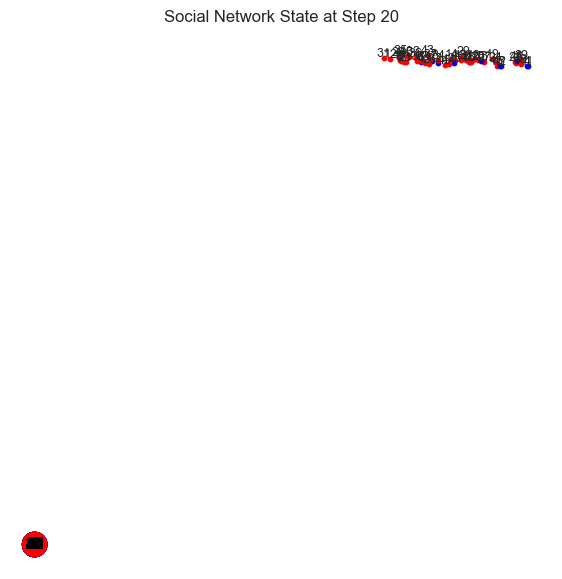

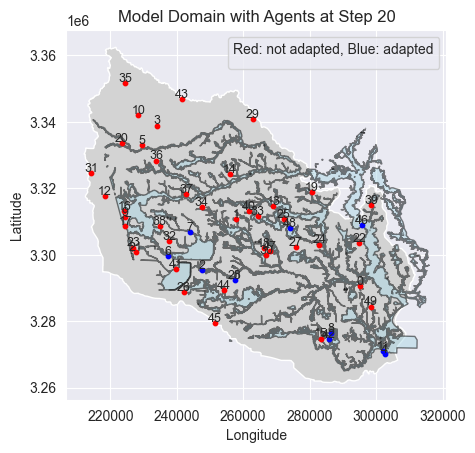

In [1]:
import mesa
import pandas as pd
from agents import Households, Government
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    households_agents = [agent for agent in model.schedule.agents if isinstance(agent, Households)]
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in households_agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    for agent in households_agents:
           ax.scatter(agent.location.x, agent.location.y, color=colors[agent.unique_id], s=10)
           ax.annotate(str(agent.unique_id), (agent.location.x, agent.location.y), textcoords="offset points", xytext=(0,1), ha='center', fontsize=9)
        
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
    model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents() 

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data


FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.000000              0.000000          0.000000   
     1                   0.442516              0.505952          0.000000   
     2                   2.437086              0.803834          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   1.742607              0.745270          0.000000   
...                           ...                   ...               ...   
19   45                  0.619478              0.564688          0.524268   
     46                  4.077838              0.893712          2.772812   
     47                  0.241892              0.400496          0.274810   
     48                  1.397301              0.706711          1.073558   
     49                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  IsEligible  Takesloan  Takesgrant  \
Step AgentID                                                                    
0    0                 0.000000      False       False      False       False   
     1                 0.000000      False       False      False       False   
     2                 0.000000      False       False      False       False   
     3                 0.000000      False       False      False       False   
     4                 0.000000      False       False      False       False   
...                         ...        ...         ...        ...         ...   
19   45                0.535552      False        True      False       False   
     46                0.826368       True        True      False        True   
     47                0.422773      False        True      False       False   
     48                0.660693       True        True      False        True   
     49                0.000000      False       False      False       False   

              FriendsCount                                       location  \
Step AgentID                                                                
0    0                   2   POINT (295205.15833026014 3290454.506506781)   
     1                   3   POINT (257801.14184670773 3310810.666416527)   
     2                   6    POINT (247604.7311139478 3295405.476653486)   
     3                   3   POINT (233973.05839574762 3338917.382874166)   
     4                   4    POINT (302570.0456484052 3270088.186432556)   
...                    ...                                            ...   
19   45                  3   POINT (251505.55473950016 3279571.622003078)   
     46                  3  POINT (295690.81542351353 3308942.6361598084)   
     47                  5   POINT (267943.45585661154 3301085.804719529)   
     48                  4   POINT (274113.4872245558 3308163.4465002003)   
     49                  3   POINT (298475.11457816855 3284427.049395872)   

              AdaptedFriendsCount  Rank  
Step AgentID                             
0    0                          0     0  
     1                          0     0  
     2                          0     0  
     3                          0     0  
     4                          0     0  
...                           ...   ...  
19   45                         0    17  
     46                         1     3  
     47                         3    27  
     48                         1    10  
     49                         2    50  

[1000 rows x 12 columns]

In [3]:
sum_result = agent_data.iloc[351:400].loc[(agent_data['Rank'] < 7), 'FloodDamageActual'].sum()

print(f"Sum of 'FloodDamageActual' for Rank under 10: {sum_result}")


Sum of 'FloodDamageActual' for Rank under 10: 4.863007957981638


In [4]:
sum_result = agent_data.iloc[351:400].loc[(agent_data['Rank'] < 10), 'FloodDamageEstimated'].sum()

print(f"Sum of 'FloodDamageEstimated' for Rank under 10: {sum_result}")

Sum of 'FloodDamageEstimated' for Rank under 10: 7.215646218845523


In [5]:
sum_result = agent_data.iloc[351:400]['FloodDamageEstimated'].sum()

print(f"Sum of 'FloodDamageEstimated' for rows 351 to 400: {sum_result}")


Sum of 'FloodDamageEstimated' for rows 351 to 400: 20.314184163726576


In [6]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households,total_eligible_households,total_loanstaken_households,total_flooddamage_households,total_grantstaken_households
0,0,0,0,0.000000,0
1,0,0,0,0.000000,0
2,0,0,0,0.000000,0
3,0,0,0,0.000000,0
4,0,0,0,0.000000,0
5,0,0,0,19.034204,0
6,0,34,0,19.034204,0
7,10,34,0,19.034204,10
8,10,34,0,19.034204,10
9,10,34,0,19.034204,10


In [7]:
if model.government.gives_grant is not None:
    print(model.government.gives_grant)
else:
    print("Value is None or evaluates to False.")

True


In [ ]:
params = dict(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz",base_probability_agent=range(1,50,2))

#Paramameters can be added to the params section to change them in the batchrunner.
#minimum_damage_loan_eligibility_factor_agent=np.arange(0,1,.1) 
#minimum_damage_loan_eligibility_factor_agent=np.arange(0,1,.1).round(1)
#friends_probability_factor_agent= range(1,20,9), 
#base_probability_agent=range(4,10,1))
#loan_threshold_agent=range(10,31,1)) 
#loan_threshold_agent=range(15,31,1))
#grant_threshold_agent=range(15,31,1)) 
              
results = mesa.batch_run(
    AdaptationModel,
    parameters=params,
    iterations=300,
    max_steps=20,
    number_processes=1,  # you can set this higher based on the number of processor cores you have
    data_collection_period=1,
    display_progress=True)

  0%|          | 0/7500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(results)
print(results_df.keys())

In [ ]:
print(pd.DataFrame(results))

In [ ]:
g = sns.lineplot(
    data=results_df,
    x="FriendsCount",
    y="IsAdapted"
)

# Set the title and labels
plot_title = "Agent Interaction"
g.set(title=plot_title, ylabel="IsAdapted")

# Limiting the x-axis from 2 to 5
g.set_xlim(2, 5)


In [ ]:
# Assuming results_df is your DataFrame and it's already defined
# Your existing code for the line plot
g = sns.lineplot(
    data=results_df,
    x="base_probability_agent",
    y="total_adapted_households"
)

# Set the title and labels
plot_title = "Effect of Base Probability on Adaptation"
g.set(title=plot_title, ylabel="Total Adapted Households")

# Adding the trendline
sns.regplot(
    data=results_df,
    x="base_probability_agent",
    y="total_adapted_households",
    scatter=False,  # Avoid re-plotting the data points
    color="black",  # Trendline color, you can choose as needed
    ax=g  # Ensures that the regression line is plotted on the existing axes and not on a new figure
)

plt.show()